**INTRODUCCIÓN AL PERCEPTRON SIMPLE**

El perceptron es la unidad base de las redes neuronales, las cuales se basán en modelos lineales para las tareas de clasificación o regresion de datos.

En el caso del perceptron, una entrada n dimensional es procesada con n cantidad de pesos para dar una estimación, la cual posteriormente es llevada a una función de activación que va a definir una clase especifica para la muestra en cuestión

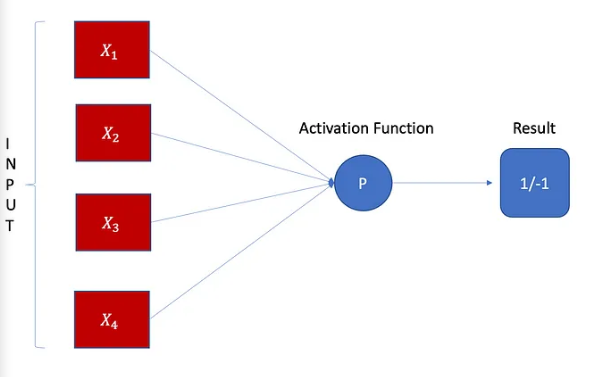

Aunque en la imagen anterior se presenta una muestra de 4 caracteristicas, tenga en cuenta que el la muestra puede ser sin ningun problema n-dimensional, lo cual implica un vector w n-dimensional. Teniendo en cuenta que el perceptron es un modelo lineal, la ecuación equivalente estaria dada por:

$\hat{y}=a(w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}.....+w_{n}x_{n})$

Donde **a** representa la función de activación.

Ahora bien, el perceptro simple aborda un problema de clasificación binaria, donde buscamos un modelo capaz de predecir entre 2 unicas clases: $[1, -1]$

Esto debido a que la función de activación nos va a estimar una de estas dos clases. La función de activación que utiliza el perceptron simple es una función de escalon unitario, lo que implica que, el producto de tu entrada n-dimensional con pesos n-dimensionales arrojará un número real. Si este número es mayor que 0, el algoritmo estimara un  $1$, y si no, estimará $-1$.

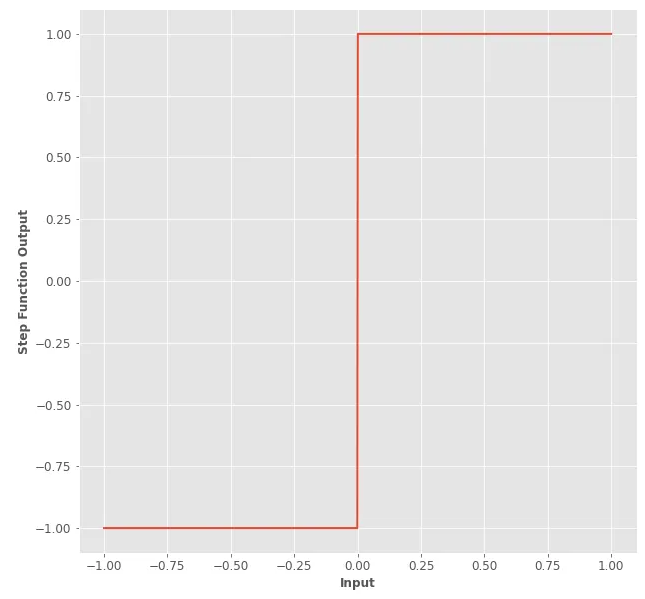

**Función de Costo**

Una vez comprendido los conceptos generales de como trabaja el perceptrón simple, debes tener en cuenta que este algoritmo tambien requiere un reajuste de los pesos para hacer la estimación de un modelo mas preciso. En este caso particular la función de costo del algoritmo esta definida de la siguiente forma:

$L(\Theta_{0},\Theta)= \begin{cases}
0 & \text{ if }   y_{i}(\Theta X_{i}+\Theta_{0})>0 \\
-{y_{i}}(\Theta X_{i}+\Theta_{0}) & \text{ if }    y_{i}(\Theta X_{i}+\Theta_{0})<0
\end{cases}$

Para el caso en que la función de costo toma valor se define la derivada de la función de costo con respecto al peso, con el fin de hacer la actualización del mismo:

$\frac{\partial L}{\partial \theta}= \theta - (-y_{i} X_{i})= \theta + y_{i} X_{i}$

$\frac{\partial L}{\partial \theta_{0}}= \theta_{0} - (-y_{i})= \theta_{0} + y_{i}$


**Implementación**

En primer lugar, como siempre, importamos las librarias que vamos a utilizar

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


Cargamos nuestros datos, en este caso los datos serán generado por un función de numpy de distribuye los datos para que sean linealmente separables

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

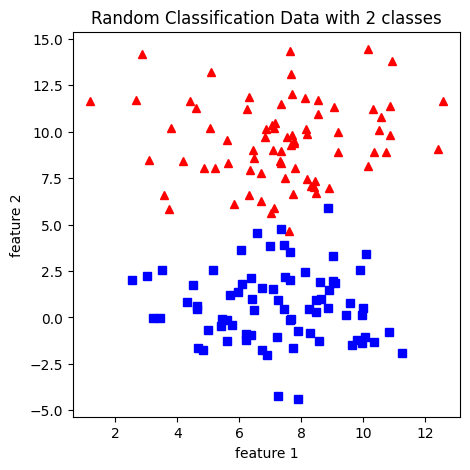

In [5]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=2.0, random_state=8)
#Plotting
y[y==0]=-1
fig = plt.figure(figsize=(5,5))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
X.shape

(150, 2)

Definimos la función de activación

In [ ]:
def step_func(z):
        return 1.0 if (z > 0) else -1.0

**Función de perceptron**

In [ ]:

def perceptron(X, y, lr, epochs):

    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    theta = np.zeros((n+1,1))# se inicializa Theta con el número de features +1 que hace referencia al bias

    n_miss_list = [] #se inicia una lista para guardar cuantos ejemplos quedan mal clasificados por epoch
    #loss_list=[]
    # Training.
    for epoch in range(epochs):
        n_miss = 0 # se crea una variable para contar las muestras mal clasificadas
        for idx, x_i in enumerate(X): #ciclo for iteractivo por todas la muestras
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) # Se inserta un 1 en la muestra para operar el bias con producto punto, en este caso X0 = 1.
            y_hat = step_func(np.dot(x_i.T, theta)) # Calculo de prediction/hypothesis.
            #if (np.squeeze(y_hat) - y[idx]) != 0:
            if (np.squeeze(y_hat)*(y[idx])) != 1: #si suma a la funcipon de costo, esta mal clasificada
                #theta += lr*((y[idx] - y_hat)*x_i)
                theta += lr*(y[idx]*x_i) #ajusta los parametros en caso de que se cumpla la condición
                # Incrementing by 1.
                n_miss += 1 #cuenta el dato mal clasificado

        n_miss_list.append(n_miss) #añade la cantidad de muestras mal etiquetadas de cada epoca a una lista para graficar el error

    return theta, n_miss_list

def plot_decision_boundary(X, theta):

    # X --> Inputs
    # theta --> parameters

    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    print(x1)
    print(theta)
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')


[1.0420025322140258, 12.686016851548482]
[[ 0.02      ]
 [ 0.02458476]
 [-0.03647648]]


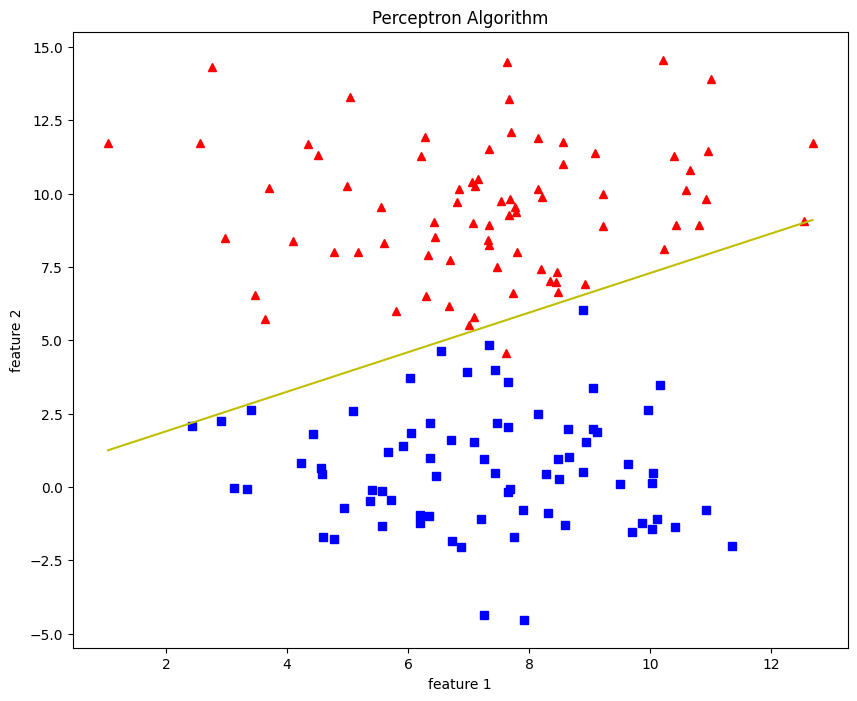

In [ ]:
theta, miss_l = perceptron(X, y, 0.001, 10)
plot_decision_boundary(X, theta)